In [1]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
#wbdata.get_source()

In [3]:
#wbdata.get_indicator(source=16)

In [4]:
#Indicators
# SE.PRM.NENR.MA      	School enrollment, primary, male (% net)
# SE.PRM.NENR.FE      	School enrollment, primary, female (% net)
# SE.SEC.NENR.MA      	School enrollment, secondary, male (% net)
# SE.SEC.NENR.FE      	School enrollment, secondary, female (% net)
# SE.PRM.CMPT.MA.ZS   	Primary completion rate, male (% of relevant age group)
# SE.PRM.CMPT.FE.ZS   	Primary completion rate, female (% of relevant age group)
# SE.ADT.LITR.MA.ZS   	Literacy rate, adult male (% of males ages 15 and above)
# SE.ADT.LITR.FE.ZS   	Literacy rate, adult female (% of females ages 15 and above)
# SE.ADT.1524.LT.FM.ZS	Literacy rate, youth (ages 15-24), gender parity index (GPI)

In [5]:
def clean(indicator):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(indicator))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [6]:
# make a dataframe from the indicator of gender equality rate
CPIA_all = clean("IQ.CPA.GNDR.XQ")

# Filter the dataset on year and on country code which are not numeric
CPIA_all_year_alpha = CPIA_all.loc[(CPIA_all['date'] == 2017) & (CPIA_all.country_code.str.isalpha())]
CPIA_OnlyCountries = CPIA_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
CPIA_worst15 = CPIA_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [7]:
# Make a dataframe from the GDP data
GDP_all = clean("NY.GDP.PCAP.CD")

# Make the value in the column "date" a string
GDP_all["date"] = GDP_all.date.astype(str)
CPIA_worst15["date"] = CPIA_worst15["date"].astype(str)

In [8]:
# wbdata.get_data("SE.PRM.NENR.MA")
# wbdata.get_data("SE.PRM.NENR.FE")
# wbdata.get_data("SE.SEC.NENR.MA")
# wbdata.get_data("SE.SEC.NENR.FE")
# wbdata.get_data("SE.PRM.CMPT.MA.ZS")
# wbdata.get_data("SE.PRM.CMPT.FE.ZS")
# wbdata.get_data("SE.ADT.LITR.MA.ZS")
# wbdata.get_data("SE.ADT.LITR.FE.ZS")
# wbdata.get_data("SE.ADT.1524.LT.FM.ZS")

In [9]:
# Make a dataframe from the indicators data
Primary_School_Male = clean ('SE.PRM.NENR.MA')
Primary_School_Female = clean ('SE.PRM.NENR.FE')
Secundary_School_Male = clean ('SE.SEC.NENR.MA')
Secundary_School_Female = clean ('SE.SEC.NENR.FE')
Complete_PrimSchool_Male = clean ('SE.PRM.CMPT.MA.ZS')
Complete_PrimSchool_Female = clean ('SE.PRM.CMPT.FE.ZS')
Literacy_Rate_Male = clean ('SE.ADT.LITR.MA.ZS')
Literacy_Rate_Female = clean ('SE.ADT.LITR.FE.ZS')
GPI = clean ('SE.ADT.1524.LT.FM.ZS')

In [52]:
#primary school
#find rows where the value is greater than 0
MalePS = Primary_School_Male.loc[(Primary_School_Male["value"] >= 0)]
FemalePS = Primary_School_Female.loc[(Primary_School_Female['value'] >=0)]
    
#find the rows with the most recent data
male_recentPS = MalePS.sort_values("date", ascending = False).drop_duplicates(["country"])
male_recentPS["date"] = male_recentPS.date.astype(str)

female_recentPS = FemalePS.sort_values('date', ascending = False).drop_duplicates(['country'])
female_recentPS['date'] = female_recentPS.date.astype(str)

#secundary school
#find rows where the value is greater than 0
MaleSS = Secundary_School_Male.loc[(Secundary_School_Male["value"] >= 0)]
FemaleSS = Secundary_School_Female.loc[(Secundary_School_Female['value'] >=0)]
    
#find the rows with the most recent data
male_recentSS = MaleSS.sort_values("date", ascending = False).drop_duplicates(["country"])
male_recentSS["date"] = male_recentSS.date.astype(str)

female_recentSS = FemaleSS.sort_values('date', ascending = False).drop_duplicates(['country'])
female_recentSS['date'] = female_recentSS.date.astype(str)

In [54]:
#Primary school enrolment
PSM15_worst15 = pd.merge( CPIA_worst15, male_recentPS, how = "left", left_on = ["country"], right_on = ["country"])
PSF15_worst15 = pd.merge( CPIA_worst15, female_recentPS, how = 'left', left_on = ["country"], right_on = ["country"])

#secundary school enrolment
SSM15_worst15 = pd.merge( CPIA_worst15,male_recentSS , how = "left", left_on = ["country"], right_on = ["country"])
SSF15_worst15 = pd.merge( CPIA_worst15,female_recentSS , how = 'left', left_on = ["country"], right_on = ["country"])


# Stack plots

In [57]:
def makeStackedBarPlot(dataframeMale, dataframeFemale, title_SBP, x_label, y_label):
    Male = dataframeMale.value_y.values
    Female = dataframeFemale.value_y.values
    Countries = dataframeMale.country.values
    
    N = len(Countries) #setting x axes
    ind = np.arange(N) 
    width = 0.4        #width of the bars
    
    #Making the bars for Male and Female
    p1 = plt.bar(ind, Male, width, label = 'Male', color='blue')
    p2 = plt.bar(ind, Female, width, bottom=Male, label = 'Female', color='pink')
    
    plt.xticks(ind, Countries, fontsize = 10, rotation = 60) #naming the bar
    plt.ylabel (y_label)
    plt.xlabel (x_label)
    plt.title (title_SBP)
    
    plt.legend()
    plt.show()
    


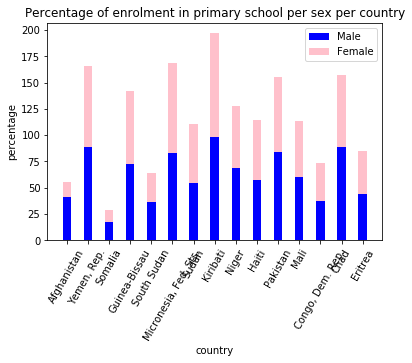

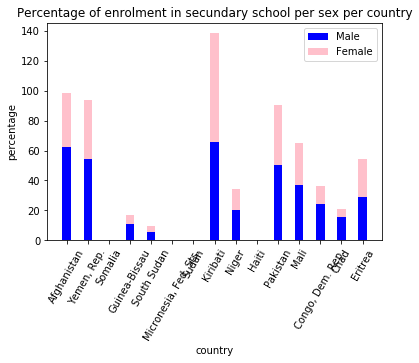

In [58]:
makeStackedBarPlot (PSM15_worst15, PSF15_worst15,"Percentage of enrolment in primary school per sex per country", 'country', 'percentage')
makeStackedBarPlot (SSM15_worst15, SSF15_worst15,"Percentage of enrolment in secundary school per sex per country", 'country', 'percentage')

In [59]:
CPM_All = Complete_PrimSchool_Male.loc[(Complete_PrimSchool_Male["value"] >= 0)]
CPF_All = Complete_PrimSchool_Female.loc[(Complete_PrimSchool_Female['value'] >=0)]

#find the rows with the most recent data
CPM_recent = CPM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
CPM_recent["date"] = CPM_recent.date.astype(str)

CPF_recent = CPF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
CPF_recent['date'] = CPF_All.date.astype(str)

In [60]:
CPM15_worst15 = pd.merge( CPIA_worst15, CPM_recent, how = "left", left_on = ["country"], right_on = ["country"])
CPF15_worst15 = pd.merge( CPIA_worst15, CPF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

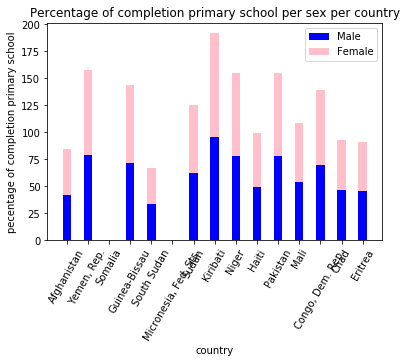

In [61]:
makeStackedBarPlot (CPM15_worst15, CPM15_worst15,"Percentage of completion primary school per sex per country", 'country', 'pecentage of completion primary school')

In [62]:
LRM_All = Literacy_Rate_Male.loc[(Literacy_Rate_Male["value"] >= 0)]
LRF_All = Literacy_Rate_Female.loc[(Literacy_Rate_Female['value'] >=0)]

#find the rows with the most recent data
LRM_recent = LRM_All.sort_values("date", ascending = False).drop_duplicates(["country"])
LRM_recent["date"] = LRM_recent.date.astype(str)

LRF_recent = LRF_All.sort_values('date', ascending = False).drop_duplicates(['country'])
LRF_recent['date'] = LRF_All.date.astype(str)

In [63]:
LRM15_worst15 = pd.merge( CPIA_worst15, LRM_recent, how = "left", left_on = ["country"], right_on = ["country"])
LRF15_worst15 = pd.merge( CPIA_worst15, LRF_recent, how = 'left', left_on = ["country"], right_on = ["country"])

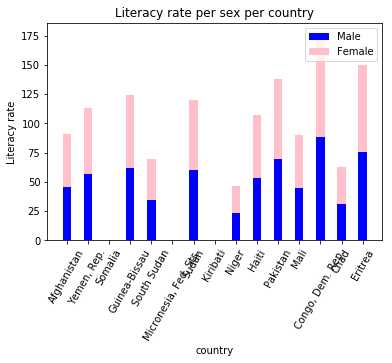

In [64]:
makeStackedBarPlot (LRM15_worst15, LRM15_worst15,"Literacy rate per sex per country", 'country', 'Literacy rate')

In [28]:
def select_year():
    years = GPI.loc[(GPI['date'] >= 2007) & (GPI['date'] <= 2017)]

    years_worst = years[years.country.isin(list(CPIA_worst15.country))]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    for i in years_worst_sorted.country.unique():
        years_worst_sorted.loc[years_worst_sorted['country'] == i]  = years_worst_sorted.loc[(years_worst_sorted['country'] == i)].ffill().bfill()
    return years_worst_sorted

GPI_years = select_year()

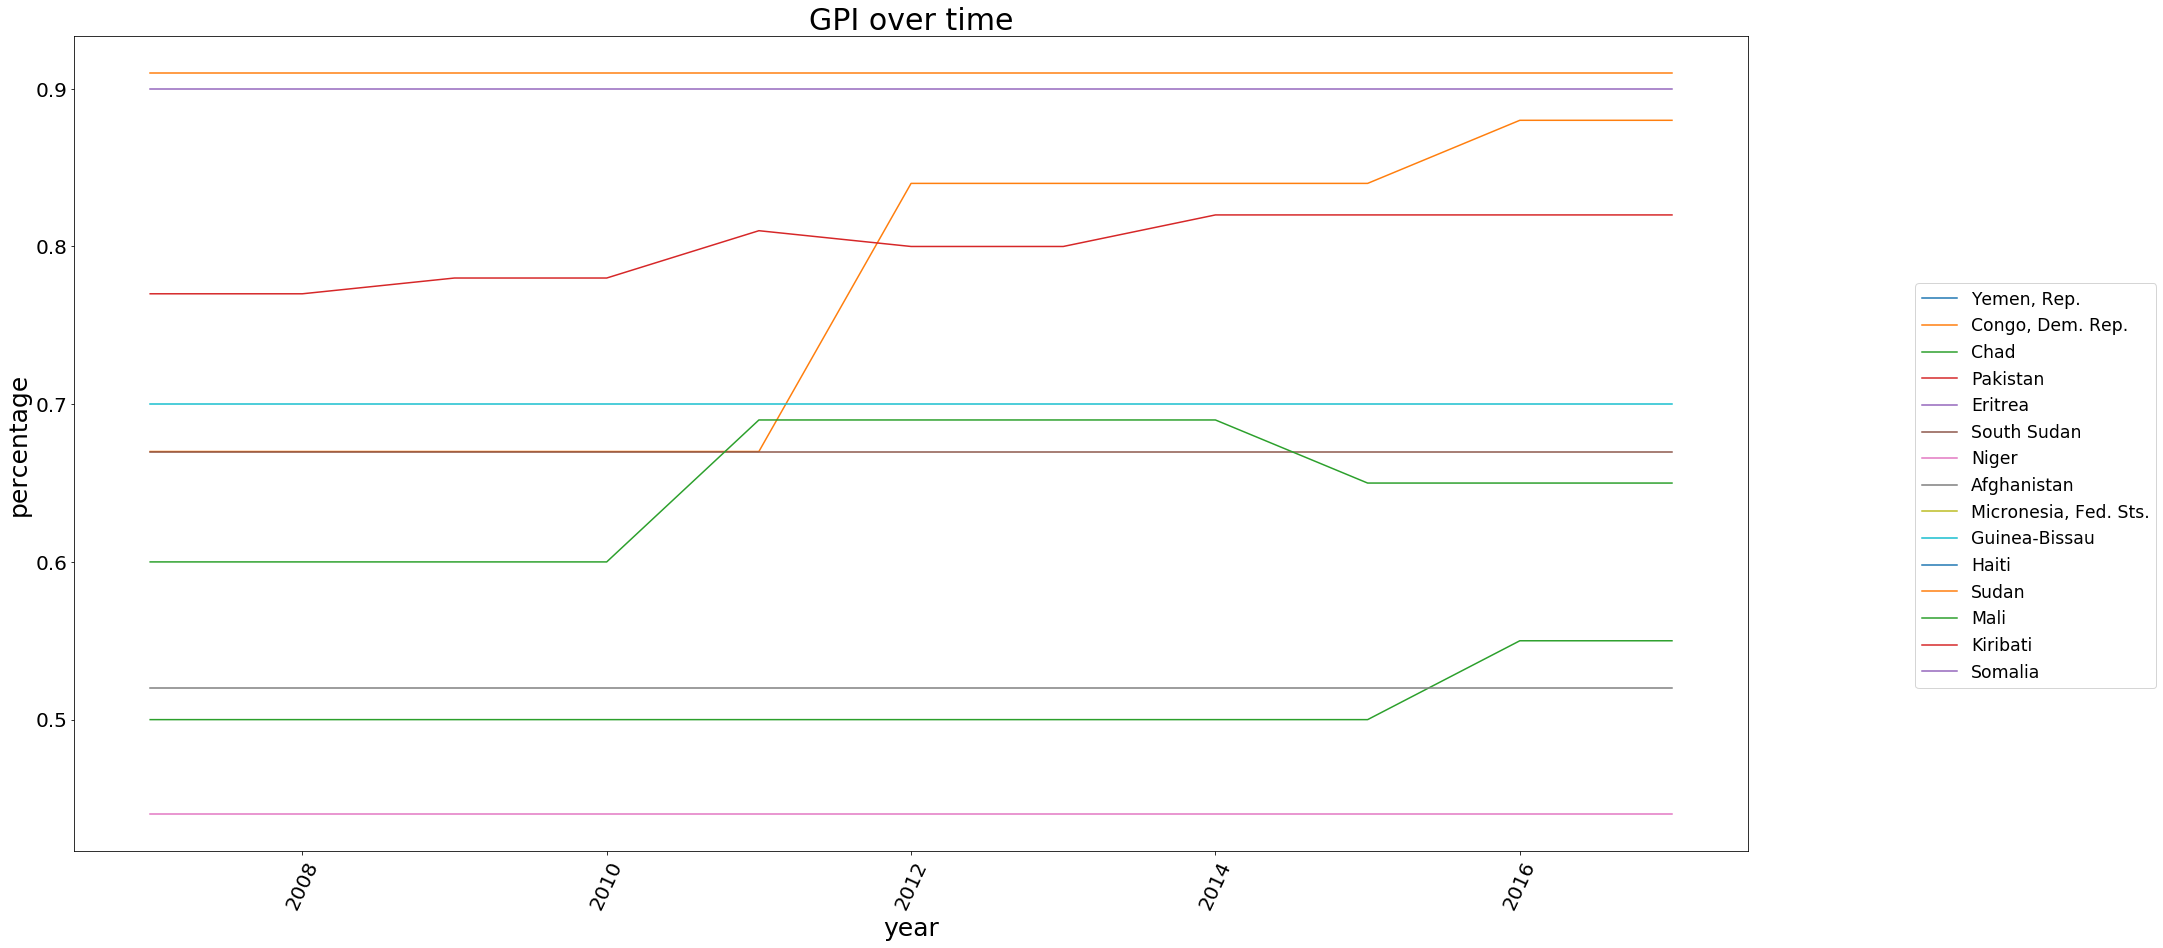

In [29]:
def graph(dataframe, title_graph, x_label, y_label):
    # Visualising changes over time per indicator

    fig,ax = plt.subplots(figsize=(30, 15))

    for name in dataframe["country"].unique():
        ax.plot(dataframe[dataframe.country==name].date,dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25)
    
graph(GPI_years, 'GPI over time', "year", "percentage")